<a href="https://colab.research.google.com/github/fatjan/learn-tensorflow/blob/master/Week1_exercise_handwritting_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 2
In the course you learned how to do classificaiton using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:

It should succeed in less than 10 epochs, so it is okay to change epochs= to 10, but nothing larger
When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
If you add any additional variables, make sure you use the same names as the ones used in the class
I've started the code for you below -- how would you finish it?

In [0]:
import tensorflow as tf
# DO NOT CHANGE THE LINE BELOW. If you are developing in a local
# environment, then grab mnist.npz from the Coursera Jupyter Notebook
# and place it inside a local folder and edit the path to that location


4


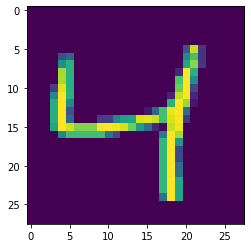

In [14]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(x_train[2])
print(y_train[2])

In [0]:
# GRADED FUNCTION: train_mnist
def train_mnist():
    # Please write your code only where you are indicated.
    # please do not remove # model fitting inline comments.

    # YOUR CODE SHOULD START HERE
    class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0.01):
          print("\nReached 99% accuracy so cancelling training!")
          self.model.stop_training = True
    callbacks = myCallback()
    # YOUR CODE SHOULD END HERE

    mnist = tf.keras.datasets.mnist

    (x_train, y_train),(x_test, y_test) = mnist.load_data()
    # YOUR CODE SHOULD START HERE
    x_train = x_train / 255.0
    x_test = x_test / 255.0
    # YOUR CODE SHOULD END HERE
    model = tf.keras.models.Sequential([
        # YOUR CODE SHOULD START HERE
        tf.keras.layers.Flatten(), 
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
        # YOUR CODE SHOULD END HERE
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # model fitting
    history = model.fit(# YOUR CODE SHOULD START HERE
        x_test, y_test, epochs=9, callbacks=[callbacks]
              # YOUR CODE SHOULD END HERE
    )
    # model fitting
    return history.epoch, history.history['accuracy'][-1]

In [11]:
train_mnist()

Epoch 1/9
313/313 [==============================] - 1s 4ms/step - loss: 0.3946 - accuracy: 0.8873
Epoch 2/9
313/313 [==============================] - 1s 4ms/step - loss: 0.1669 - accuracy: 0.9502
Epoch 3/9
313/313 [==============================] - 1s 4ms/step - loss: 0.0993 - accuracy: 0.9703
Epoch 4/9
313/313 [==============================] - 1s 4ms/step - loss: 0.0629 - accuracy: 0.9809
Epoch 5/9
313/313 [==============================] - 1s 4ms/step - loss: 0.0396 - accuracy: 0.9895
Epoch 6/9
313/313 [==============================] - 1s 4ms/step - loss: 0.0218 - accuracy: 0.9951
Epoch 7/9
313/313 [==============================] - 1s 4ms/step - loss: 0.0160 - accuracy: 0.9961
Epoch 8/9
308/313 [============================>.] - ETA: 0s - loss: 0.0096 - accuracy: 0.9985
Reached 99% accuracy so cancelling training!
313/313 [==============================] - 1s 4ms/step - loss: 0.0095 - accuracy: 0.9985


([0, 1, 2, 3, 4, 5, 6, 7], 0.9984999895095825)